<!-- ![RWTH Logo](https://www.rwth-aachen.de/global/show_picture.asp?id=aaaaaaaaaaagazb) -->
![iAMB Logo](https://www.iamb.rwth-aachen.de/global/show_picture.asp?id=aaaaaaaaaanwtny)
# Biolog File Data Analysis

* Execute a single cell: <span class="fa-play fa"></span>
* Execute all cells: Menu: Run <span class="fa-chevron-right fa"></span> Run All Cells
* To reboot kernel: <span class="fa-refresh fa"></span>

Find more in the reference (menu: Help <span class="fa-chevron-right fa"></span> Jupyter Reference).

## Introduction

Description Biolog system.


In [1]:
import os
import csv
import string
from datetime import date
from itertools import compress

import matplotlib.pyplot as plt
%matplotlib inline

from iambcodes.biolog import *


### Import data and plot the mean OD

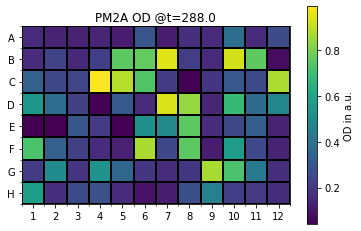

In [16]:
Today = date.today().strftime('%y%m%d')
Target_Directory = '/home/ulf/Documents/Ustilago_maydis-GEM/data/BIOLOG/Biolog21' # 'BIOLOG_Data'
# Choose Biolog array, either PM1 or PM2A
PM = 'PM2A' 
FileName = os.path.join(Target_Directory, '{}_newStandard.xlsx'.format(PM))
PM_mean, PM_stdv = ImportXls(FileName)
# extract time vector from the first column
TimeSample = -1
Time = PM_mean.iloc[:,0].values

Plot_Title = '{} OD @t={}'.format(PM, Time[TimeSample])
Colorbar_Name = 'OD in a.u.'
# None if no figure export
FigureFile = None #'{}_OdMean-FinalT.svg'.format(PM) #None
if FigureFile:
    FigureFile = os.path.join(Target_Directory, '{}_{}'.format(Today, FigureFile))

# Processing data
VisualizeWell(PM_mean.iloc[TimeSample,1:].values, plot_title=Plot_Title, plot_z_name=Colorbar_Name, export_file=FigureFile)

### Plot relative standard deviation of OD

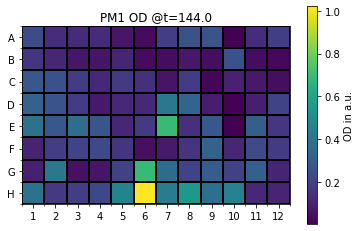

In [3]:
Plot_Title = '{} OD @t={}'.format(PM, Time[TimeSample])
Colorbar_Name = 'OD in a.u.'
FigureFile = None #'{}_Well-Stdv.png'.format(PM)
if FigureFile:
    FigureFile = os.path.join(Target_Directory, '{}_{}'.format(Today, FigureFile))

PM_relStdv = PM_stdv.iloc[TimeSample,1:].values / PM_mean.iloc[TimeSample,1:].values
VisualizeWell(PM_relStdv, plot_title=Plot_Title, plot_z_name=Colorbar_Name, export_file=FigureFile)

### Histogramm of ODs

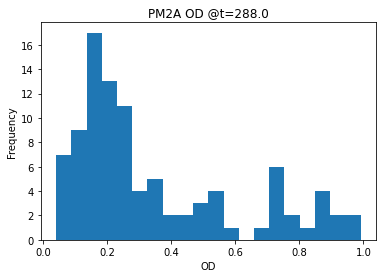

In [10]:
Plot_Title = '{} OD @t={}'.format(PM, Time[TimeSample])
Colorbar_Name = 'in a.u./h'
bins = 20
xlabel = 'OD'
ylabel = 'Frequency'
FigureFile =  '{}_HistFinalT.svg'.format(PM) #'{}_HistFinalT.png'.format(PM) # None if no figure export
if FigureFile:
    FigureFile = os.path.join(Target_Directory, '{}_{}'.format(Today, FigureFile))

# mySlope = SlopeCalc(PM1_mean.values, zero_max=True)
plt.hist(PM_mean.iloc[TimeSample,1:].values, bins=bins)
plt.title(Plot_Title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
if FigureFile:
    plt.savefig(FigureFile)
plt.show()


### Set activity threshold and export substrate activity

In [17]:
# loading PM well substrates and ids
PM_List_Name = os.path.join('BIOLOG_Data', '{}_SubstrateList.csv'.format(PM))
with open(PM_List_Name, newline='') as f:
    reader = csv.reader(f)
    lines = [(line[0].split(';')) for line in reader]
    
PMNames = list(np.array(lines)[:,0])
PMIDs = list(np.array(lines)[:,1])
myWellIDs = WellIDs()

Activity_Thresh: .4


BIOLOG substrate use stored as: /home/ulf/Documents/Ustilago_maydis-GEM/data/BIOLOG/Biolog21/220215_PM2A_SubstrateUse.csv


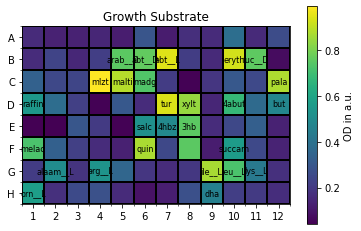

In [18]:
# Define threshold of OD which is defined as active substrate usage for growth
Activity_Thresh = float(input('Activity_Thresh:'))
PMTruth = PM_mean.iloc[TimeSample,1:].values>Activity_Thresh
Active_File = 'SubstrateUse.csv'
File = os.path.join(Target_Directory, '{}_{}_{}'.format(Today, PM, Active_File))

with open(File, 'w') as f:
    for Sub, ID, Well, Act in zip(PMNames, PMIDs, myWellIDs, PMTruth):
        mySubstrate = '{},{},{},{}\n'.format(Well, Sub, ID, Act)
        f.write(mySubstrate)
FigureFile = '{}_OdMean-FinalT+Substrates.png'.format(PM)
if FigureFile:
    FigureFile = os.path.join(Target_Directory, '{}_{}'.format(Today, FigureFile))
    print('BIOLOG substrate use stored as: {}'.format(File))

VisualizeWellSubstrate(PM_mean.iloc[TimeSample,1:].values, PMIDs, PMTruth, plot_title='Growth Substrate', plot_z_name='OD in a.u.', export_file=FigureFile)